<a href="https://colab.research.google.com/github/katherymbr/ML-TP3-parte1/blob/main/TP3/TP3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO # 1**

Supongamos que tenemos un dataset mezcla de dos grupos aleatorios bidimensionales (cada uno con 100 datos, su centroide y covariancia).
Tip: reutilizar el código de la NB que vimos para outliers.
Encontrar un clasificador por K-NN y evaluar exactitud, precisión, f-measure. Tomar inicialmente un dataset de entrenamiento de N=100 (50+50), k=10, y validar con el resto del dataset. Hacer algunos experimentos con otros N y k, y también cambiando centroide y covariancia de las clases.

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
N_data = 100
mediaA1 = 5
mediaB1 = 2
desvA1 = 2
desvB1 = 2.5

mediaA2 = 6
mediaB2 = 8
desvA2 = 2
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y
59,1,6.672497,4.871740
197,0,5.900468,9.250188
50,1,4.956232,1.154314
76,1,5.961371,3.092231
159,0,5.563762,7.957801


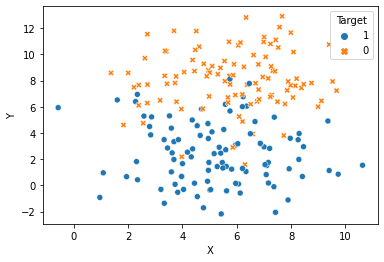

In [3]:
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")

Se fracciona el Dataset en Train y Test en 50/50

In [4]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Se entrena el modelo KNN para un valor de 10 vecinos cercanos y se observan los parametros de calidad del modelo

In [5]:
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        53
           1       0.79      0.89      0.84        47

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100




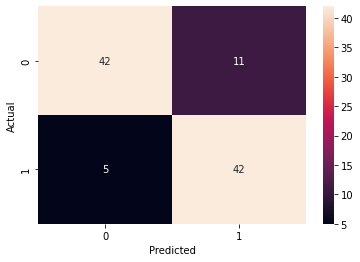

In [6]:
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Se puede observar como el modelo en general hace una buena clasificación y manteniendo los parametros de calidad del modelo por encima de 0.9

**Variando el tamaño de dataset N = 100, 300, 600, 900. Manteniendo k = 10**

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        54
           1       0.89      0.70      0.78        46

    accuracy                           0.82       100
   macro avg       0.84      0.81      0.81       100
weighted avg       0.83      0.82      0.82       100




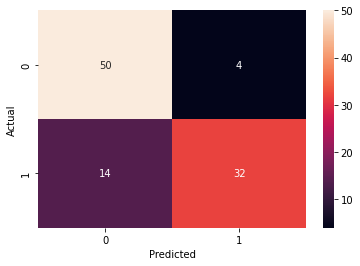

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       149
           1       0.93      0.85      0.89       151

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300




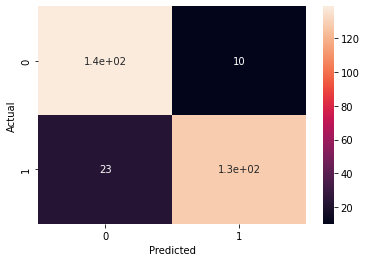

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       298
           1       0.97      0.90      0.93       302

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600




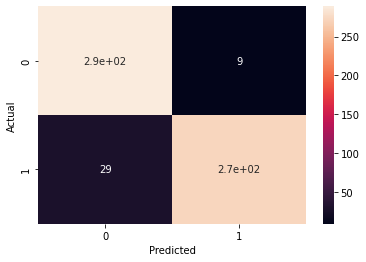

Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       445
           1       0.93      0.89      0.91       455

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900




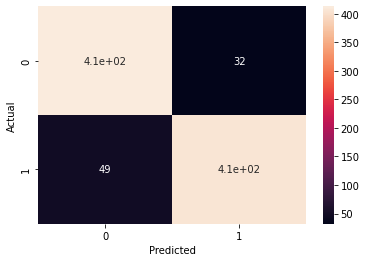

In [7]:
N_data = [100, 300, 600, 900]

for a in N_data:

  X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=a), np.random.normal(loc= mediaB1, scale=desvB1, size=a)
  df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

  X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=a), np.random.normal(loc= mediaB2, scale=desvB2, size=a)
  df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

  df = pd.concat([df1,df2], ignore_index= True, axis=0)
  df = df.sample(n = a*2) 
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
  knn.fit(X_train, y_train)
  y_predicted =knn.predict(X_test)
  print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
  confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()

Existe alguna variación en los parametros de calidad del modelo a medida que se aumenta el numero de datos, esto debido a la distribución de estos en fucion de la media y la covarianza. Sin embargo el modelo es muy estable y mantiene buenos indices de clasificación. 

**Variando el numero de vecinos k, para N = 100**

valor de k =5
Classification report for classifier KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        54
           1       0.88      0.93      0.91        46

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100




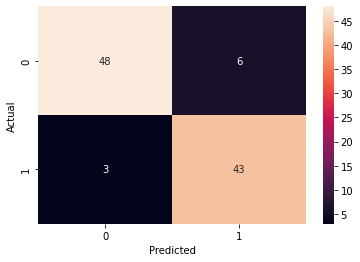

valor de k =10
Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.93      0.93      0.93        46

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100




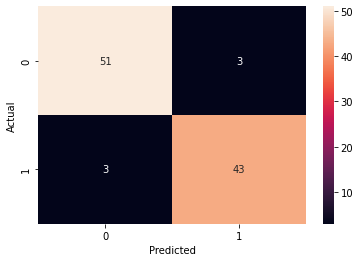

valor de k =20
Classification report for classifier KNeighborsClassifier(n_neighbors=20)
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.91      0.89      0.90        46

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100




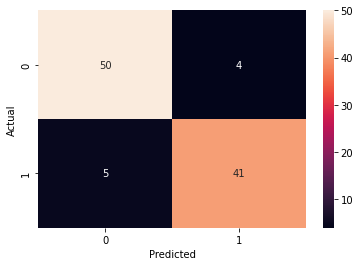

valor de k =40
Classification report for classifier KNeighborsClassifier(n_neighbors=40)
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.91      0.89      0.90        46

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100




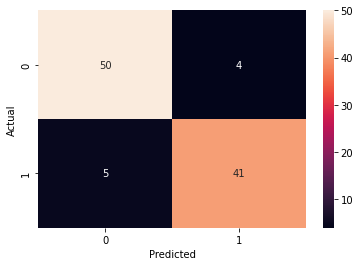

valor de k =80
Classification report for classifier KNeighborsClassifier(n_neighbors=80)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        54
           1       0.91      0.91      0.91        46

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100




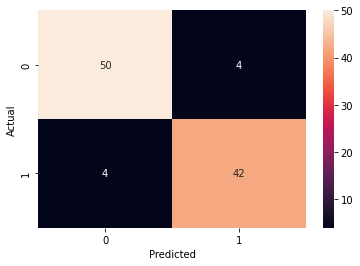

In [8]:

N_data = 100

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 

X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

knn = [5, 10, 20, 40, 80]

for k in knn:
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predicted =knn.predict(X_test)
  print('valor de k =' + str(k))
  print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
  confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
  sns.heatmap(confusion_matrix, annot=True)
  plt.show()

Puede observarse un comportamiento inestable en función del numero de vecinos para el cual el modelo hace la clasificación, sin embargo se observa como involucrar un valor muy alto de k puede ser nocivo para el modelo como el en caso de k = 80. Es por esto que el valor de k debe estar alrededor de la raiz de N. Ademas que entre más vecinos a considerar más lento es el modelo.

**Variando los centroides y covarianzas del Dataset, con k = 10**

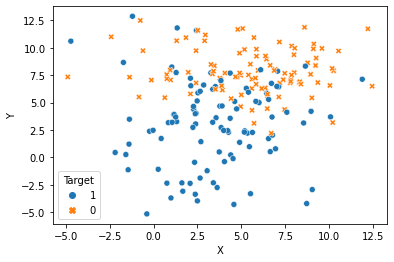

In [9]:
N_data = 100
mediaA1 = 4
mediaB1 = 3
desvA1 = 3
desvB1 = 4

mediaA2 = 6
mediaB2 = 8
desvA2 = 3
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")


Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        51
           1       0.83      0.82      0.82        49

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100




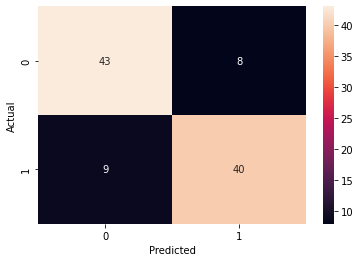

In [10]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Puede observarse como al tener un dataset con medias mas cercanas y covarianza mas dispersa, al modelo se le dificulta clasificar estos datos confusos, lo cual es de esperarse puesto que es un clasificador muy simple y por lo general una buena clasificación depende en gran medida de la dispersion de los datos. 

**Probando con un dataset de 3 clases**

In [11]:
N_data = 100
mediaA1 = 4
mediaB1 = 3
mediaC1 = 5
desvA1 = 3
desvB1 = 4
desvC1 = 3

mediaA2 = 6
mediaB2 = 8
mediaC2 = 5
desvA2 = 3
desvB2 = 2
desvC2 = 4

X1, Y1, Z1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data), np.random.normal(loc= mediaC1, scale=desvC1, size=N_data)
df1 = pd.DataFrame({'Target':'1','X':X1,'Y':Y1, 'Z':Z1})

X2, Y2, Z2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data), np.random.normal(loc= mediaC1, scale=desvC1, size=N_data) 
df2 = pd.DataFrame({'Target':'0','X':X2,'Y':Y2, 'Z':Z2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y,Z
84,1,6.761774,2.715755,7.588803
166,0,5.637999,9.209719,1.010150
6,1,3.086665,-2.818057,8.564322
95,1,2.947045,3.325141,8.296693
28,1,8.034764,0.223076,4.553707


Classification report for classifier KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        50
           1       0.84      0.72      0.77        50

    accuracy                           0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100




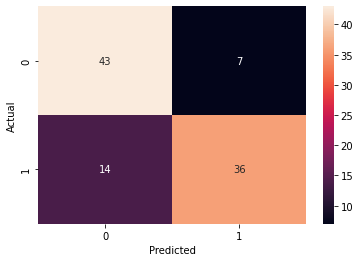

In [12]:
X = df.iloc[:,1:4]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predicted =knn.predict(X_test)
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))
confusion_matrix = pd.crosstab(y_test, y_predicted, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

El proceso de entrenamiento no cambia si hay mas varibles, solo hay que involucrar las nuevas features a la hora de entrenar el modelo. En este caso el modelo tiene problemas para predecir el Target 1, habria que verificar si con otros parametros el modelo logra una mejor predicción y un mejor valor de los parametros de calidad.